# Assignment 2

## Objective of this assignment
The objective of this assignment is to get an understanding of the many ways data can be visualized. Upon completing this exercise you should be familiar with histograms, boxplots and scatter plots.


## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 3.3
- Jonathon Shlens, *A tutorial on Principal Component Analysis* , https://arxiv.org/abs/1404.1100


## 2.1 Visualizing wine data (4.5 points)

In this part of the exercise we will consider two data sets related to red and white variants of the Portuguese "Vinho Verde" wine[1]. The data has been downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality. Only physicochemical and sensory attributes are available, i.e., there is no data about grape types, wine brand, wine selling price, etc. The data has the following attributes:

| #   |  Attribute      | Unit |
| --- |:--------------- |:---- |
| 1   | Fixed acidity (tartaric) | g/dm3 |
| 2   | Volatile acidity (acetic) | g/dm3 |
| 3   | Citric acid | g/dm3 |
| 4   | Residual sugar | g/dm3 |
| 5   | Chlorides | g/dm3 |
| 6   | Free sulfur dioxide | mg/dm3 |
| 7   | Total sulfur dioxide | mg/dm3 |
| 8   | Density | g/cm3 |
| 9   | pH | pH |
| 10  | Sulphates | g/dm3 |
| 11  | Alcohol | % vol. |
| 12  | Quality score | 0-10 |

Attributes 1-11 are based on physicochemical tests and attribute 12 on human judging. The data set has many observations that can be considered outliers and in order to carry out analyses it is important to remove the corrupt observations.

The aim of this exercise is to use visualization to identify outliers and remove these outliers from the data. It might be necessary to remove some outliers before other outlying observations become visible. Thus, the process of finding and removing outliers is often iterative. The wine data is stored in a MATLAB file, Data/wine.mat

*This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.*

> 2.1.1 Load the data into Python using the scipy.io.loadmat() function. This data set contains many observations that can be considered outliers. Plot a box plot and a histogram for each attribute to visualize the outliers in the data set. From prior knowledge we expect volatile acidity to be around 0-2 g/dm3, density to be close to 1 g/cm3, and alcohol percentage to be somewhere between 5-20% vol. We can safely identify the outliers for these attributes, searching for the values, which are a factor of 10 greater than the largest we expect. Identify outliers for volatile acidity, density and alcohol percentage, and remove them from the data set. Plot new box plot and histogram for these attributes and compare them with initial ones.
 + *You can use the scipy.stats.zscore() to standardize your data before you plot a boxplot.*
 + *You can use the function matplotlib.pyplot.subplot() to plot several plots in one figure.*


In [1]:
##Answer to question 2.1.1

import scipy                    #importing ordered by line length for those bonus points!
import scipy.stats                                    
import numpy as np
import pandas as pd
from scipy import io
import seaborn as sns
import matplotlib.pyplot as plt


winedata=scipy.io.loadmat('data/wine.mat')                        #load the data

winevarlist=[]                                                    #extract list of variable names to use in DF
for i in range(12):
    winevarlist.append(winedata['attributeNames'][0][i][0])

winedata_df=pd.DataFrame(winedata['X'], columns=winevarlist )      #Dataframes are nice, lets use that.

In [2]:
# We create a new Dataframe with Z-scores
winedataZ_df=pd.DataFrame()

cols = list(winedata_df.columns)

for col in cols:
    col_zscore = col + '_zscore'
    winedataZ_df[col_zscore] =  scipy.stats.zscore(winedata_df[col])

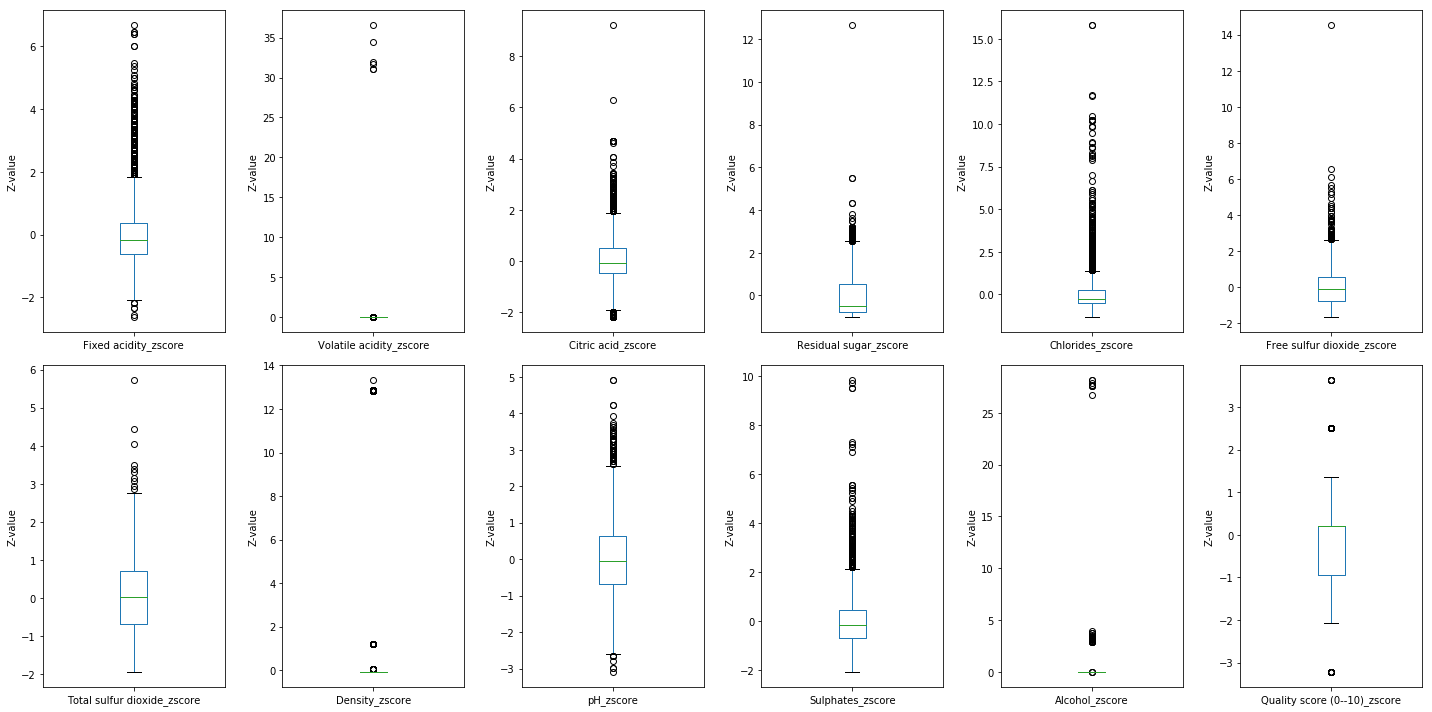

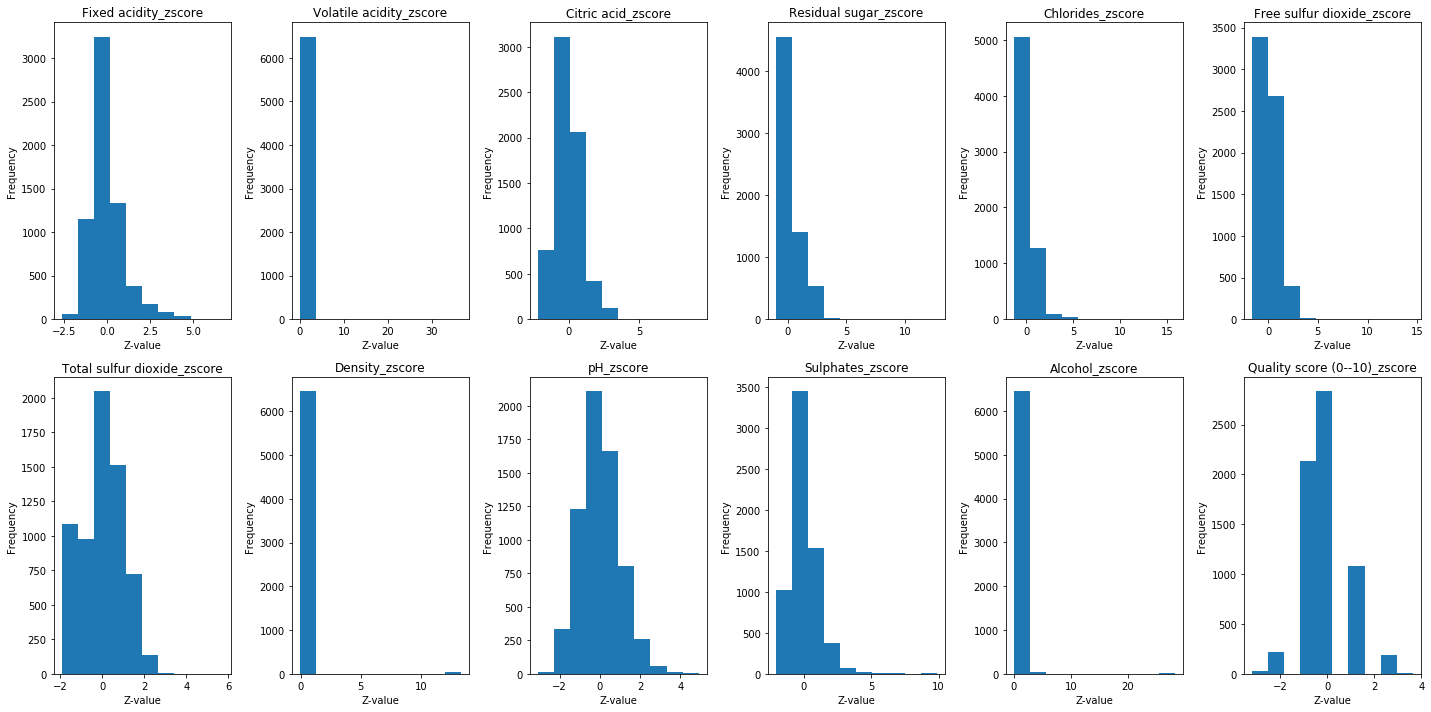

boxplots and histograms for displaying the distribution of Z-standardised values in the different wine data variables


In [3]:
# Boxplots for the original Z-transformed data
plt.figure(figsize=(20,10)) 
for i,var in enumerate(winedataZ_df.columns):
    plt.subplot(2,6,i+1)
    winedataZ_df[var].plot.box()
    plt.ylabel('Z-value')
    
plt.tight_layout()    
plt.show()

# Histograms for the original Z-transformed data
plt.figure(figsize=(20,10)) 
for i,var in enumerate(winedataZ_df.columns):
    plt.subplot(2,6,i+1)
    winedataZ_df[var].plot.hist()
    plt.xlabel('Z-value')
    plt.title(var)
    
plt.tight_layout()    
plt.show()



print('boxplots and histograms for displaying the distribution of Z-standardised values in the different wine data variables')

In [4]:
# Identify outliers for VOLATILE ACIDITY. We expect volatile acidity values to be between 0 and 2. 
# We will remove an observation if its value for acidity is greater than 20.

outlier_acid=np.where(winedata_df['Volatile acidity']>20)[0]


# Identify outliers for DENSITY. We expect density values to be around 1. 
# We will remove an observation if its value for density is greater than 10.

outlier_dens=np.where(winedata_df['Density']>10)[0]


# Identify outliers for ALCOHOL. We expect alcohol values to be between 5 and 20. 
# We will remove an observation if its value for alcohol is greater than 20.

outlier_alco=np.where(winedata_df['Alcohol']>200)[0]


# Combine the three arrays. We use np.unique to make sure we don't have double entries.
outlier_comb=np.unique(np.concatenate([outlier_acid,outlier_dens,outlier_alco])) 

# We drop the outlier rows from the dataframe.
winedataclean_df=winedata_df.drop(winedata_df.index[outlier_comb])

# We need to compute Z-scores again.
winedatacleanZ_df=pd.DataFrame()

cols = list(winedataclean_df.columns)

for col in cols:
    col_zscore = col + '_zscore'
    winedatacleanZ_df[col_zscore] =  scipy.stats.zscore(winedataclean_df[col])

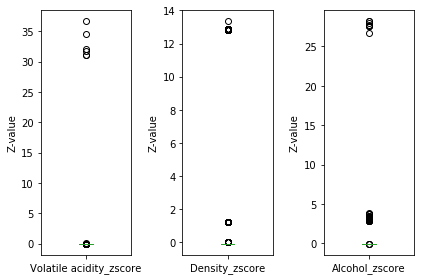

     --- original above, cleaned below  ---


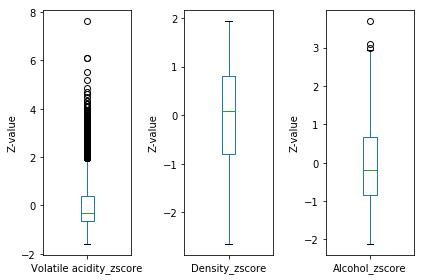

Boxplots for displaying the distribution of Z-standardised values in three of the wine data variables
The originals are on the top, after cleaning we get the distributions on the bottom


In [5]:
# Boxplots for the original Z-transformed data
plt.figure(figsize=(6,4)) 
for i,var in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    winedataZ_df[var].plot.box()
    plt.ylabel('Z-value')
    
plt.tight_layout()    
plt.show()

print('     --- original above, cleaned below  ---')

# Boxplots for the cleaned Z-transformed data
plt.figure(figsize=(6,4)) 
for i,var in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    winedatacleanZ_df[var].plot.box()
    plt.ylabel('Z-value')
    
plt.tight_layout()    
plt.show()




print('Boxplots for displaying the distribution of Z-standardised values in three of the wine data variables')
print('The originals are on the top, after cleaning we get the distributions on the bottom')




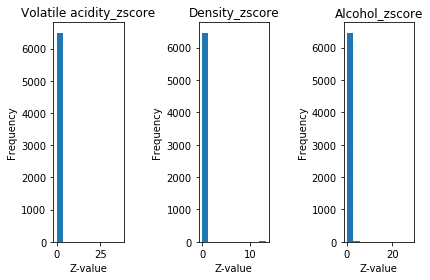

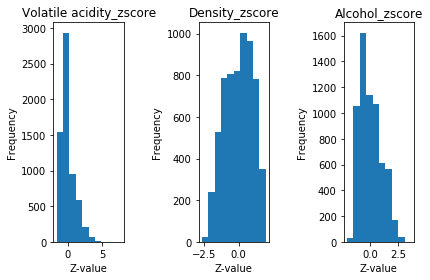

Histograms for displaying the distribution of Z-standardised values in three of the wine data variables
The originals are on the top, after cleaning we get the distributions on the bottom


In [6]:
# Histograms for the original Z-transformed data
plt.figure(figsize=(6,4)) 
for i,var in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    winedataZ_df[var].plot.hist()
    plt.xlabel('Z-value')
    plt.title(var)
    
plt.tight_layout()    
plt.show()



# Histograms for the cleaned Z-transformed data
plt.figure(figsize=(6,4)) 
for i,var in enumerate(['Volatile acidity_zscore','Density_zscore','Alcohol_zscore']):
    plt.subplot(1,3,i+1)
    winedatacleanZ_df[var].plot.hist()
    plt.xlabel('Z-value')
    plt.title(var)
    
plt.tight_layout()    
plt.show()



print('Histograms for displaying the distribution of Z-standardised values in three of the wine data variables')
print('The originals are on the top, after cleaning we get the distributions on the bottom')



When we compare the new, cleaned boxplots to the original ones, we can immediately see that we can visualize the boxplot much better as the y-axis is no longer being scaled to huge values due to the outliers, visually flattening the boxplot. 


When we compare the new, cleaned histograms to the original ones, we can see that the data now looks to be more normally distributed. Before, the automatically selected bin sized were huge due to some outliers with extreme values. This resulted in the bulk of the data being aggregated into a single bin. This was not very informative. We can much more clearly visualize the distribution now.

For both visualization methods, we have markedly improved their clarity.

> 2.1.2 Make scatter plots between attributes and wine quality as rated by human judges. Can you manually identify any clear relationship between the attributes of the wine and wine quality? Which values of these attributes are associated with high quality wine?
+ *You can calculate the correlation coefficient using the scipy.stats.pearsonr() function to measure the strength of association.*

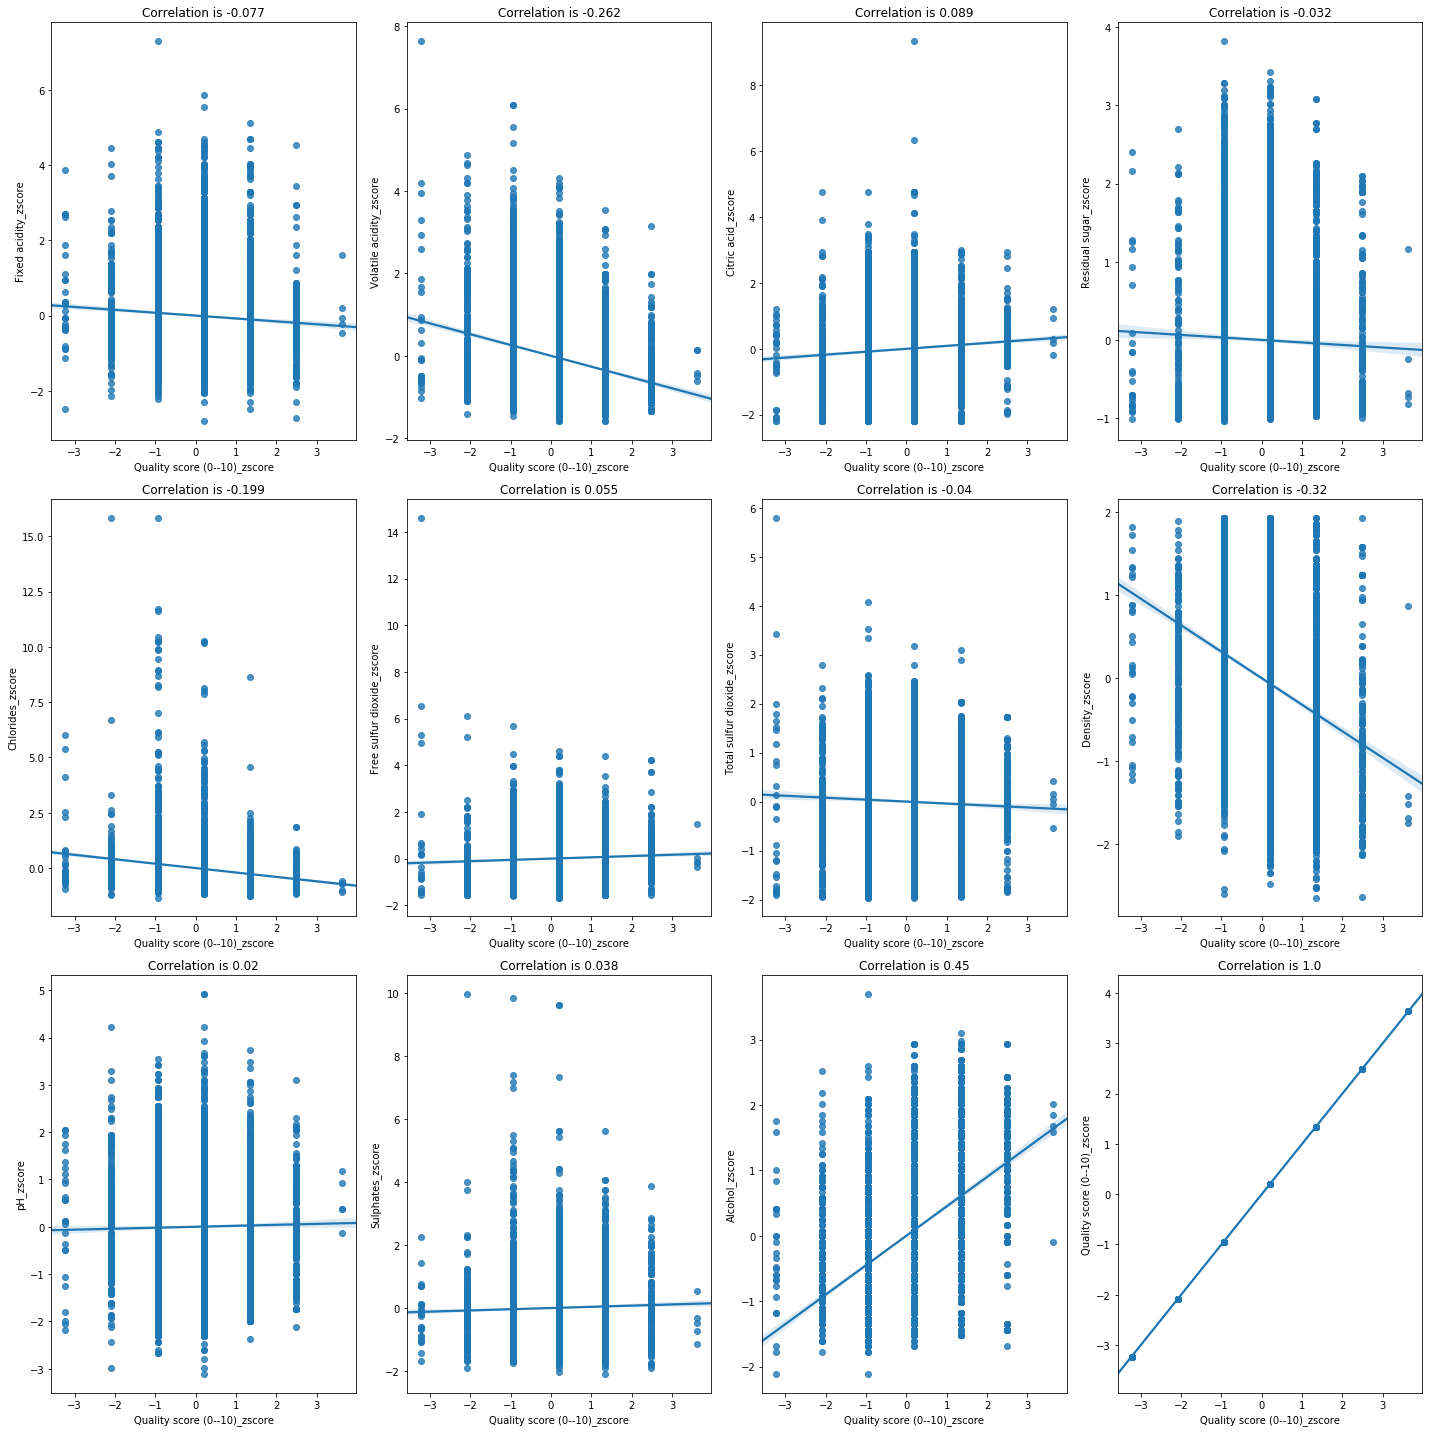

 These plots describe the relationship between the quality score variable and the other variables in the wine dataset


In [7]:
# I will use the cleaned data for this purpose.

# Scatteplots with correlation values between Quality score and all variables in the wine data.
plt.figure(figsize=(20,20)) 
for i,var in enumerate(winedatacleanZ_df.columns):
    plt.subplot(3,4,i+1)
    sns.regplot(winedatacleanZ_df['Quality score (0--10)_zscore'],winedatacleanZ_df[var])
    correl=scipy.stats.pearsonr(winedatacleanZ_df['Quality score (0--10)_zscore'],winedatacleanZ_df[var])
    plt.title('Correlation is '+str(round(correl[0],3)))
    
plt.tight_layout()    
plt.show()

print(' These plots describe the relationship between the quality score variable and the other variables in the wine dataset')

From the plots above I can identify a clear negative relationship (correlation is -0.32) between Density and Quality score. Furthermore there appears to be a strong positive relationship between Alcohol percentage and Quality score (correlation is 0.45)... who would have thought? :)

## 2.2 Visualizing the handwritten digits (4 points)

In this part of the exercise we will analyse the famous *mnist* handwritten digit dataset from: http://yann.lecun.com/exdb/mnist/.

> 2.2.1 Load zipdata.mat by using the loadmat function. There are two data sets containing handwritten digits: *testdata* and *traindata*. Here, we will only use *traindata*. The first column in the matrix *traindata* contains the digit (class) and the last 256 columns contain the pixel values.
Create the data matrix *X* and the class index vector *y* from the data. Remove
the digits with the class index 2-9 from the data, so only digits belonging to
the class 0 and 1 are analyzed. Visualize the first 10 digits as images. 
Next, compute the principal components (PCA) of the data matrix. Now,
using the PCA, create a new data matrix *Xpca*. The new data matrix should have 4 attributes corresponding to PC1-PC4. Reconstruct the initial data using PC1-PC4. Visualize the first 10 digits as images for the reconstructed data and compare them with images for the original data.
Make a matrix of scatter plots of each combination of two principal components
for PC1-PC4 against each other. Make a 3-dimensional scatter plot of three
principal components PC1-PC3. Plot elements belonging to different classes in
different colors. Add a legend to clarify which digit is shown in which color.
+ *The below example code can help you visualize digits as images.*
+ *See Assignment 1 if you can not recall how to compute a PCA.*
+ *Keep in mind that numpy.linalg.svd() returns the transposed **V<sup>T</sup>** matrix as output.*
+ *You can use * **Z** = **Y**\***V**[:,:4] to project the data onto the first four PCs.*
+ *To reconstruct the data from projection you can use the following formula: **W** = **Z**&ast;**V**[:,:4]<sup>T</sup> + **μ**. *


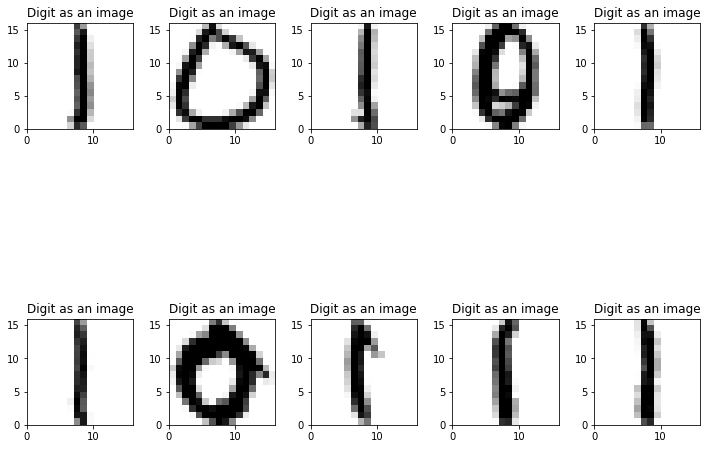

 The first ten digits (with class 0 or 1) from the mnist dataset


In [2]:
##Answer to question 2.2.1

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from numpy import reshape


digits=scipy.io.loadmat('data/zipdata.mat') 

# Extract variables of interest
traindata = digits['traindata']
X = traindata[:,1:]
y = traindata[:,0]

# Get indices of digits with class 0 or 1, and extract only these from y and X.
zeros=np.where(y == 0)[0]
ones=np.where(y == 1)[0]
keep=np.sort(np.concatenate([zeros,ones]))
y=y[keep]
X=X[keep]

# Visualize the first 10 digits as images.
plt.figure(figsize=(10,10)) 
for i in range(10):
    plt.subplot(2,5,i+1);
    I = reshape(X[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
        
plt.tight_layout()    
plt.show()

u,s,v =np.linalg.svd(X)

print(' The first ten digits (with class 0 or 1) from the mnist dataset')


In [7]:
print(len(ones))
print(len(zeros))
print(np.shape(traindata))

1005
1194
(7291, 257)


In [9]:
# Apply the SVD
U, S, V =np.linalg.svd(X)

# Take first 4 PCs
Xpca=V.T[:,:4]

# Project original data onto the new components
Z=np.dot(X,Xpca)

# Reconstruct the data using only the first 4 PCs
W=np.dot(Z,Xpca.T)

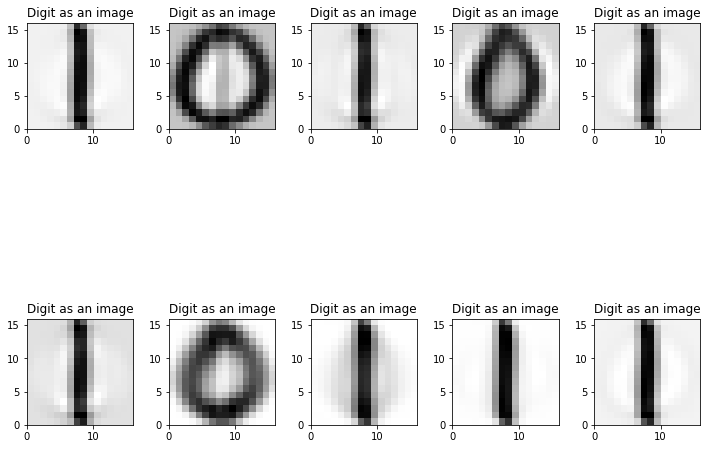

 The first ten digits (with class 0 or 1) from the mnist dataset reconstructed from the first 4 PCs


In [10]:
# Visualize the first 10 digits as images from the reconstructed data.
plt.figure(figsize=(10,10)) 
for i in range(10):
    plt.subplot(2,5,i+1);
    I = reshape(W[i,:],(16,16))
    plt.imshow(I, extent=(0,16,0,16), cmap=cm.gray_r);
    plt.title('Digit as an image');
        
plt.tight_layout()    
plt.show()



print(' The first ten digits (with class 0 or 1) from the mnist dataset reconstructed from the first 4 PCs')

Comparing the original data images with the images from the reconstructed data, the identities are still very clearly recognisable. I find this impressive since we scaled down from a 256-dimensional space to a 4-dimensional space. As to the differences, the images from the reconstructed data are noticeably less idiosyncratic, and have more grey-tones as opposed to the black-and-white of the original. What's more, in some images with identity 1 you can vaguely recognise the numer 0, and vice versa.

In [11]:
import pandas as pd
Z_df=pd.DataFrame(Z) # Turn Z into a dataframe to make for easier plotting
Z_df.columns=['PC 1','PC 2','PC 3','PC 4',]


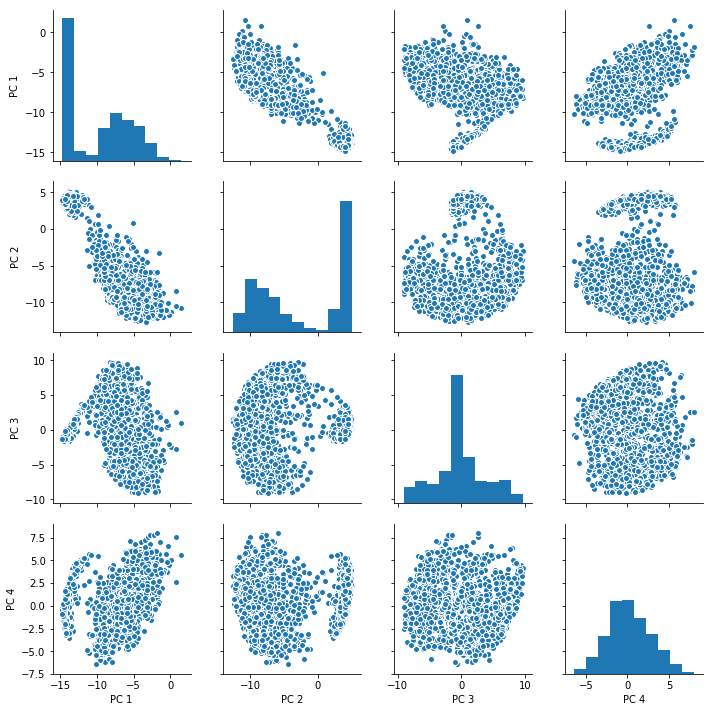

 A scatterplot matrix for the four PCs of the mnist data. On the diagonal you will see the distribution of the values within the respective PC


In [12]:
sns.pairplot(Z_df)
plt.show()

print(' A scatterplot matrix for the four PCs of the mnist data. On the diagonal you will see the distribution of the values within the respective PC')

In [13]:
# Acquire the new locations of the ones and zeros within y
zeros_new=np.where(y==0)
ones_new=np.where(y==1)

# Make new array in which we will store our colors
colarray=np.array(['placeholder' for i in y])

# Assign colorvalues to the right array elements
colarray[zeros_new]='blue'
colarray[ones_new]='red'

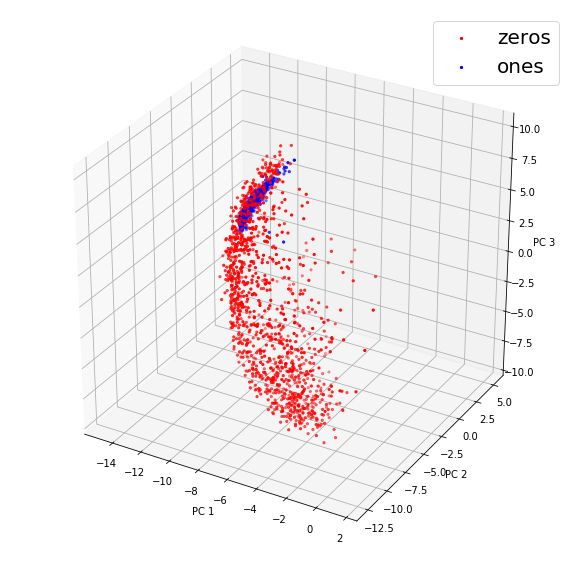

Three-dimensional plot for the first three principal components. We can here see already see some separation between the zeros (BLUE) and the ones (RED). Furthermore, the ones appear to be much more similar to one another in terms of the first three PCs as they are grouped more closely


In [23]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')



plotcols=np.array([[1,0,0],[0,1,0],[0,0,1]])

ax.scatter3D(Z[:,0][zeros_new],Z[:,1][zeros_new],Z[:,2][zeros_new], s=5, c='red', label='zeros')
ax.scatter3D(Z[:,0][ones_new],Z[:,1][ones_new],Z[:,2][ones_new], s=5, c='blue', label='ones')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(prop={'size': 20})
plt.show()

print('Three-dimensional plot for the first three principal components. We can here see already see some separation between the zeros (BLUE) and the ones (RED). Furthermore, the ones appear to be much more similar to one another in terms of the first three PCs as they are grouped more closely')

## 2.3 Probability and Statistics (1.5 points)
The aim of this exercise is to learn how to calculate basic statistics in python.
> 2.3.1 A study of a very limited population of Aliens reveals the following number of body appendages (limbs):
<center>2,3,6,8,11,18</center>
i. Find the mean $m$ and the standard deviation $\sigma$ of this population.
+ *You can use the methods numpy.ndarray.mean() and numpy.ndarray.std() to calculate the mean and standard deviation.*

In [15]:
##Answer to question 2.3.1

appendages=np.array([2,3,6,8,11,18])

print('The mean amount of appendages is')
print(np.mean(appendages))
print()
print('The standard deviation across the appendages is')
print(np.std(appendages))


The mean amount of appendages is
8.0

The standard deviation across the appendages is
5.385164807134504


> ii. List all possible samples of two aliens without replacement, and find each mean. Do the same with samples of four aliens.
+ *You can use the method itertools.combinations(v,n) to find all possible samples of a vector v taking n elements at a time.*

In [16]:
##Answer to question 2.3.2
import itertools


# All samples of two from appendages, and their means.
means2=np.zeros(15)
for n,i in enumerate(itertools.combinations(appendages,2)):
    print(i,'and the mean is' ,np.mean(i))
    means2[n]=np.mean(i)       # Add this mean into an array for use in the next exercise
    
print()    

# All samples of four from appendages, and their means.
means4=np.zeros(15)
for n,i in enumerate(itertools.combinations(appendages,4)):
    print(i,'and the mean is' ,np.mean(i))
    means4[n]=np.mean(i)       # Add this mean into an array for use in the next exercise

(2, 3) and the mean is 2.5
(2, 6) and the mean is 4.0
(2, 8) and the mean is 5.0
(2, 11) and the mean is 6.5
(2, 18) and the mean is 10.0
(3, 6) and the mean is 4.5
(3, 8) and the mean is 5.5
(3, 11) and the mean is 7.0
(3, 18) and the mean is 10.5
(6, 8) and the mean is 7.0
(6, 11) and the mean is 8.5
(6, 18) and the mean is 12.0
(8, 11) and the mean is 9.5
(8, 18) and the mean is 13.0
(11, 18) and the mean is 14.5

(2, 3, 6, 8) and the mean is 4.75
(2, 3, 6, 11) and the mean is 5.5
(2, 3, 6, 18) and the mean is 7.25
(2, 3, 8, 11) and the mean is 6.0
(2, 3, 8, 18) and the mean is 7.75
(2, 3, 11, 18) and the mean is 8.5
(2, 6, 8, 11) and the mean is 6.75
(2, 6, 8, 18) and the mean is 8.5
(2, 6, 11, 18) and the mean is 9.25
(2, 8, 11, 18) and the mean is 9.75
(3, 6, 8, 11) and the mean is 7.0
(3, 6, 8, 18) and the mean is 8.75
(3, 6, 11, 18) and the mean is 9.5
(3, 8, 11, 18) and the mean is 10.0
(6, 8, 11, 18) and the mean is 10.75


> iii. Each of the means above is called a sample mean. Find the mean of all the sample means (denoted by $m_x$) and the standard
deviation of all the sample means (denoted by $\sigma_x$) for both
the *N=2* and *N=4* samples.

In [24]:
##Answer to question 2.3.3

# I assembled arrays with the sample means within the loops in the cell above. 

print(np.mean(means2))

print(np.mean(means4))

print('The means are both still the same as taking the mean from all five elements at once. This means (haha..) that this is an unbiased estimator.')

8.0
8.0
The means are both still the same as taking the mean from all five elements at once. This means (haha..) that this is an unbiased estimator.


> iv. Verify the Central Limit Theorem: (i) compare the population
mean with the mean of both sample means; (ii) compare the population
standard deviation divided by the square root of the sample size
with the standard deviation of both sample means (i.e., does
$\sigma_x \approx \sigma/\sqrt{N}$). BTW, a better approximation for
small population sizes is $\sigma_x = \sigma / \sqrt{N} \times
\sqrt{(M-N)/(M-1)}$ with *M = 6* the size of the original

In [18]:
print('std of the original')
print(np.std(appendages))
print()
print('std of the samples with n=2 and n=4')
print(np.std(means2))
print(np.std(means4))
print()
print('CLT test (should be close to the std found in samples)')
print(np.std(appendages)/np.sqrt(2))
print(np.std(appendages)/np.sqrt(4))
print()
print('improved CLT test (should be close to the std found in samples)')
print(np.std(appendages)/np.sqrt(2)*np.sqrt((6-2)/(6-1))           )
print(np.std(appendages)/np.sqrt(4)*np.sqrt((6-4)/(6-1))                  )

std of the original
5.385164807134504

std of the samples with n=2 and n=4
3.40587727318528
1.70293863659264

CLT test (should be close to the std found in samples)
3.807886552931954
2.692582403567252

improved CLT test (should be close to the std found in samples)
3.40587727318528
1.70293863659264


Dividing the original std by the square root of n certainly brings the std closer to those found in the samples. However, only when we apply the second (better) approximation do we get really great (perfect?) correspondence.

> v. Plot the distribution of the population and the distributions of both sample means using histograms. What happens to the shape of the sample means distribution as the sample size (N*) increases?

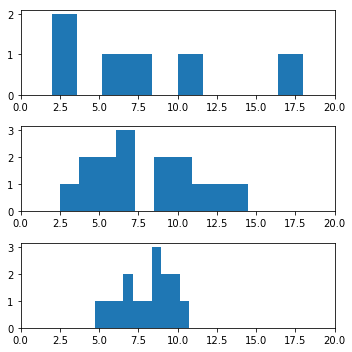

 Distributions for the mean from the original (top), the sample with n=2 (middle), and the sample with n=4 (bottom). We see that the distribution becomes more narrow around the mean and more normal. This is in accordance with their respective values for std.


In [19]:
##Answer to question 2.3.5

plt.figure(figsize=(5,5)) 

plt.subplot(311)
plt.hist(appendages)
plt.xlim(0,20)

plt.subplot(312)
plt.hist(means2)
plt.xlim(0,20)


plt.subplot(313)
plt.hist(means4)
plt.xlim(0,20)


plt.tight_layout()
plt.show()


print(' Distributions for the mean from the original (top), the sample with n=2 (middle), and the sample with n=4 (bottom). We see that the distribution becomes more narrow around the mean and more normal. This is in accordance with their respective values for std.')
